# PARASHIKIMI I TERMETEVE NE GREQI

* Per realizimin e projektit jane perdorur disa librari qe ofrojne metoda te gatshme per realizimin e shume funksioneve. Ne vijim do te sqarojme rolin e seciles.

* Fillimisht jane perfshire librarite per perpunimin e te dhenave. Perdoren per te realizuar procesin e shnderrimit te te dhenave te papunuara ("te pagatuara") ne nje format me te pershtatshem per analizim.

**PANDAS** -> librari per analizimin dhe manipulimin e te dhenave. Ofron mundesi per selektim, insertim, fshirje, sortim, filtrim, bashkim, pastrim, indeksim te te dhenave. Permban DataFrame, nje array 2-dimensional, 
por qe paraqet te dhenat sikur tabelat e zakonshme. DataFrame konverton ne "tabela te zakonshme" qofte listat, 'dictionary' ose array. Permes kesaj librarie, mund te hapim fajlla lokal (si CSV, TSV, Excel) ose remote permes URL-ve (CSV, JSON, SQL). Ekziston edhe konvertimi i DataFrame ne keto lloje fajllash.

**NUMPY** -> librari per procesim te array dhe 'scientific computing'. Mundeson krijimin e array shumedimensional (me elemente edhe me tipe te ndryshme) dhe funksione per te manipuluar me to. Sa i perket llogaritjeve, me te mund te zhvillohet algjeber lineare, transformime Furie, etj.

**RANDOM** -> librari qe mundeson gjenerim te rastesishem te numrave ne shperndarje te ndryshme. Per intexhere, behet zgjedhje uniforme e numrave nga nje rang. Per vargje, behet zgjedhje uniforme e elementeve ne varg, zgjedhje e mostrave te rastesishme pa zevendesim etj.

Gjate zhvillimit eshte perdorur edhe vizualizimi. Me ane te tij, informacioni permbledhet, kuptohet ne menyre me intuitive dhe lehtesohet identifikimi i trendeve dhe modeleve. Librarite qe kane ndihmuar ne kete proces jane:

**SEABORN** -> Jep nje nderfaqe te nivelit te larte per vizatimin e grafikeve statistikore terheqes dhe informues.

**MATPLOTLIB** -> Ofron nje API te orientuar ne objekte per mberthimin e vizatimeve te grafikeve statistikore ne aplikacione qe perdorin vegla me qellim te pergjithshem per GUI si Tkinter.

Germimi i te dhenave definohet si ekzaminimi i databazave te medha per te nxjerrur informacion te ri. Ekzistojne disa modele ne 'machine learning' me te cilat mund te zhvillohet ky proces. Libraria qe mundeson perdorimin e ketyre modeleve eshte 'scikit-learn'. 

**SKLEARN** -> Mundeson perdorimin e algoritmve te ndryshme te 'machine learning' si klasifikimi, regresioni dhe kllasterimi. Eshte dizajnuar asisoj qe te nderveproje me librarite e Python si 'NumPy' dhe 'SciPy'.

**KNeighborsRegressor** -> Per parashikimin e termeteve ne Greqi, eshte zgjedhur algoritimi i kllasterimit, KNN. Punon ne baze te fqinjve qe ka nje element i caktuar. Prandaj eshte importuar kjo librari.

Gjate perpunimit te te dhenave, eshte hasur ne pranine e disa lokacioneve qe me nuk i takojne shtetit te Greqise. Per largimin e ketyre lokacioneve, jane perdorur librarite si ne vijim.

**JSON** -> librari qe mundeson punen me te dhena JSON. JSON (JavaScript Object Notation) perdoret per ruajtje dhe shkembim te te dhenave.

**FOLIUM** -> librari qe perdoret per krijimin e hartave dhe theksimin e disa lokacioneve specifike te nje vendi. 

**PYGEOCODER** -> librari qe ndihmon perdorimin e gjeokodeve te Google. Lehtesisht mund te gjesh adresat qe i korrespodojne koordinatave te caktuara dhe anasjelltas. Mund te perdoret edhe per validim dhe formatim te adresave.

**SHAPELY** -> librari qe mundeson krijimin, manipulimin dhe analizimin e objekteve planare gjeometrike. Me te mund te kriojsh vija ose poligone nga nje grup i pikave gjeometrike. Mund te njehsosh syprinen e siperfaqes, perimetrin etj. dhe te kryesh operacione gjeometrike si unioni, diferenca, distanca etj. ne baze te pikave gjeometrike te ofruara si vlera hyrese. 

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from math import sqrt

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn import preprocessing

# Geolocation
import json
import folium
from pygeocoder import Geocoder
from shapely.geometry import mapping, shape
from shapely.prepared import prep
from shapely.geometry import Point

* Dataseti qe perdoret per germim te te dhenave eshte ruajtuar ne formatin CSV me emrin *earthquakes*. Permes instances *pd* te modulit *pandas*, kemi qasje ne funksionin *read_type* per te lexuar te dhenat qe barte dataseti. Rezultati rikthehet ne format te DataFrame dhe ruhet tek *data*.  

In [2]:
data = pd.read_csv('csv/earthquakes.csv') 

* Te gjitha kolonat ne DataFrame *data* mund t'i riemerojme. Me poshte jane standardizuar etiketat per secilin atribut, keshtu qe ne vazhdim qasja ne secilin prej tyre te mos krijoje dykuptimesi. 

In [3]:
data.rename(columns={'Year':'YEAR', 'Month':'MONTH','Date':'DAY', 'Hours':'HOURS', 'Minutes':'MINUTES','LATATITUDE (N)':'LATITUDE', 'LONGITUDE  (E)' : 'LONGITUDE', 'MAGNITUDE (Richter)':'MAGNITUDE' }, inplace=True)

Magnituda e nje termeti shprehet ne shkalle Rihter. Ne baze te saj, termetet klasifikohen si ne vijim:

* 2.5 e me pak, zakonisht nuk ndjehen dhe regjistrohen vetem prej seizmografeve.
* 2.5 deri 5.4, zakonisht ndjehen, por shkaktojne deme minore.
* 5.5 deri 6.0, demtime ne ndertesa dhe strukturat e tjera.
* 6.1 deri 6.9, mund te shkaktoje deme te medha ne zona shume te populluara.
* 7.0 deri 7.9, shkakton termete me deme jashtezakonisht serioze.
* 8.0 e me shume, shkaterron plotesisht komunitetet afer epiqendres. Mund te ndodhe nje ne 5 deri 10 vite.

Pasi termetet me shkalle me te vogel se 2.5 nuk jane kercenim per jeten e njeriut dhe shfaqen ne numer shume te madh pa ndonje ndikim serioz, keto vlera do te fshihen nga dataset. Fillimisht te gjitha rekordet filtrohen ne baze te kushtit *<= 2.5*, ruhen ne *rslt_df* dhe shfaqen. Me pas, ne dataset origjinal *data*, fshihen te gjitha keto rekorde dhe permes atributit *shape* te *DataFrame* shfaqet nje dyshe e renditur qe tregon numrin e rreshtave dhe kolonave qe kane mbetur.  

In [4]:
rslt_df = data[data['MAGNITUDE'] <= 2.5]
rslt_df

,YEAR,MONTH,DAY,HOURS,MINUTES,LATITUDE,LONGITUDE,MAGNITUDE
1485,1966,12,25,20,8,38.10,23.90,2.4
1602,1967,5,26,13,15,38.00,23.50,1.7
1691,1967,8,28,3,43,38.30,23.90,2.5
1822,1968,1,18,4,42,37.75,21.00,2.4
1824,1968,1,19,2,3,38.00,20.00,2.3
...,...,...,...,...,...,...,...,...
256648,2018,5,29,7,0,37.95,22.02,2.3
256649,2018,5,29,7,44,38.36,21.84,2.1
256650,2018,5,29,9,29,38.57,20.96,1.7
256653,2018,5,29,10,58,39.99,20.59,2.5


In [5]:
data = data.drop(data[data.MAGNITUDE  <= 2.5].index)
data.shape

(119975, 8)

* Dataseti *data* permban te dhenat per termetet qe kane ndodhur ne Greqi ne mes te periudhes 1901 - 2018. Megjithate, gjate viteve 1913 deri ne 1947 kane ndodhur 9 demarkime te kufirit. Ekziston mundesia, qe disa lokacione te kesaj periudhe te mos perfshihen ne kufinjte aktual te shtetit. Ato do te fshihen pasi qe synimi eshte parashikimi i termeteve ne baze te kufinjeve qe momentalisht ka Greqia.

* Fillimisht hapet GeoJSON fajlli me enkodim *utf8* dhe ruhet ne variablen *data_Greece*. Objektet gjeometrike me disa atribute shtese jane *feature* objekte. P.sh. ekziston feature *geometry* e definuar si ne vijim:

  `{ "type": "Feature", "geometry": { "type": "Point", "coordinates": [125.6, 10.1] }`

* Te dhenat e lokacioneve ne datasetin tone jane pikerisht me koordinata. Prandaj, per kompatibilitet, edhe nga GeoJSON fajlli zgjedhim feature *geometry* per te marur te gjitha lokacionet aktuale qe ka territori i Greqise. Pastaj permes funksionit *shape* keto lokacionet theksohen dhe ruhen ne *gr*. 

In [6]:
with open('Greece_AL2.GeoJson', encoding="utf8") as json_file:
    data_Greece = json.load(json_file)

countries = {}
gr = ''
for feature in data_Greece['features']:
    geom = feature['geometry']
    gr = shape(geom)
    countries['Greece'] = prep(gr) 

* Ne variablen *m* e ruajme funksionin *foulium.map()* i cili mundeson markimin e teritorit grek duke e vendosur ate ne qender te hartes bazuar ne argumentet *LONGITUDE* dhe *LATITUDE*.

In [7]:
m = folium.Map([data['LATITUDE'].mean(), data['LONGITUDE'].mean()], #Vendos vendin me LATITUDE dhe LONGITUDE ne qender te hartes.
               zoom_start=6, min_zoom = 5, max_zoom = 7) #lejon qe max zoom te jete 18, por e kemi kufizuar ne 7.
               
# Me ane te GeoJson mundesohet paraqitja e hartes duke i shnderruar vlerat e 'gr' ne Javascript per vizualizim.
# LatLngPopup() mundeson qe ne harte te vendosen pikat ku ka pasur termete. 

folium.GeoJson(gr).add_to(m) 
folium.LatLngPopup().add_to(m) 

# Me ane te unazes 'for' mundesohet iterimi ne te dhena duke mundesuar shenjimin e vendeve qe kane se paku 25 termete. 

for i in range(0,25):  #shton shenjuesit per secilin vend ne te cilin kane ndodhur 25 termete ne grupin e te dhenave
    folium.Marker([data.iloc[i]['LATITUDE'], data.iloc[i]['LONGITUDE']], 
                  popup=data.iloc[i]['YEAR']).add_to(m) 

# Paraqesim ne menyre vizuele harten me te dhena rreth termeteve ne Greqi.
m

* Me ane te funksionit *get_country* mundesohet inicializimi me *False* i te gjitha lokacioneve qe nuk bejne pjese ne territorin e Greqise (bazuar ne *LONGITUDE* dhe *LATITUDE*) dhe inicializim ne *True* te lokacioneve ne territorin e Greqise. 

In [8]:
def get_country(row):
    point = Point(row['LONGITUDE'], row['LATITUDE'])
    for country, geom in countries.items():
        if geom.contains(point):
            return True # regjistrohet lokacioni qe i takon territorit te Greqise.
    return False 

* Krijohet nje kolone e re e quajtur *Country* e cila do ti marre te gjitha te dhenat e vendosura ne funksionin *get_country*, pra do te vendosen vlerat per qytetet te cilat gjenden ose jo ne territorin e Greqise, duke mundesuar keshtu qe ne dataset te kemi vlera binare *True* ose *False*. Me pas, shfaqim te gjitha te dhenat nga dataseti (kolonat se bashku me te dhenat ne rekorde).

In [9]:
data['Country'] = data.apply(get_country, axis=1) 

In [10]:
data

,YEAR,MONTH,DAY,HOURS,MINUTES,LATITUDE,LONGITUDE,MAGNITUDE,Country
0,1901,9,12,6,15,39.00,22.20,5.6,True
1,1901,10,25,16,18,37.00,22.20,5.4,True
2,1901,12,24,23,18,37.20,22.20,5.8,True
3,1902,4,11,18,35,38.50,23.50,5.8,True
4,1902,7,5,14,56,40.80,23.20,6.6,True
...,...,...,...,...,...,...,...,...,...
256636,2018,5,28,20,41,38.70,22.80,3.2,True
256641,2018,5,28,23,11,34.62,24.06,3.0,False
256647,2018,5,29,6,11,37.46,21.82,3.3,True
256651,2018,5,29,10,25,39.57,25.99,3.9,False


* Ne *rslt_df* ruajme te gjithe lokacionet qe nuk i takojne territorit te Greqise, ne menyre qe te bejme filtrimin e dataset nga te dhenat per lokacionet te cilat nuk do te jene percaktuese ne zhvillimin e zgjidhjes se problemit per parashikimin e termeteve ne Greqi. Pastaj shfaqim rezultatet e kerkimit.

In [11]:
rslt_df = data[data['Country'] == False]
rslt_df

,YEAR,MONTH,DAY,HOURS,MINUTES,LATITUDE,LONGITUDE,MAGNITUDE,Country
9,1903,5,29,9,34,39.80,18.70,6.0,False
13,1903,11,25,23,16,42.10,23.20,6.5,False
14,1904,4,4,10,2,41.78,22.98,7.1,False
15,1904,4,4,10,25,41.80,23.10,7.8,False
16,1904,4,4,10,30,42.10,23.40,5.4,False
...,...,...,...,...,...,...,...,...,...
256608,2018,5,27,9,32,38.89,26.66,2.6,False
256633,2018,5,28,18,9,35.54,23.28,3.1,False
256641,2018,5,28,23,11,34.62,24.06,3.0,False
256651,2018,5,29,10,25,39.57,25.99,3.9,False


* Ne *data* ruajme te gjitha vlerat *True* nga kolona *Country* e datasetit. Pas ruajtjes te lokacioneve vetem brenda territorit te Greqise largojme kolonen *Country* dhe shfaqim te dhenat e mbetura, duke reduktuar keshtu sasine e te dhenave ne dataset.

In [12]:
data = data[data.Country == 1]
data = data.drop(columns='Country')
data

,YEAR,MONTH,DAY,HOURS,MINUTES,LATITUDE,LONGITUDE,MAGNITUDE
0,1901,9,12,6,15,39.00,22.20,5.6
1,1901,10,25,16,18,37.00,22.20,5.4
2,1901,12,24,23,18,37.20,22.20,5.8
3,1902,4,11,18,35,38.50,23.50,5.8
4,1902,7,5,14,56,40.80,23.20,6.6
...,...,...,...,...,...,...,...,...
256589,2018,5,26,10,34,34.78,24.19,2.9
256592,2018,5,26,15,40,35.87,23.57,3.7
256610,2018,5,27,15,33,39.49,20.25,3.0
256636,2018,5,28,20,41,38.70,22.80,3.2


* Me ane te ketij funksioni shohim te gjitha informacionet perreth te dhenave tona p.sh. numrin dhe emrin e kolonave se bashku me numrin perkates te rekordeve te cilat nuk kane vlera *null*, dhe poashtu tipin e te dhenave brenda kolonave. 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78971 entries, 0 to 256647
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       78971 non-null  int64  
 1   MONTH      78971 non-null  int64  
 2   DAY        78971 non-null  int64  
 3   HOURS      78971 non-null  int64  
 4   MINUTES    78971 non-null  int64  
 5   LATITUDE   78971 non-null  float64
 6   LONGITUDE  78971 non-null  float64
 7   MAGNITUDE  78971 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 5.4 MB


Funksioni describe mundeson *pershkrimin* e te gjitha kolonave ne dataset sipas: 
* count (numeron te gjitha rekordet ne dataset per secilen kolone), 
* mean (gjen vleren mesatare te te gjitha rekordeve ne kolone), 
* std (modul statistikor i cili mundeson llogaritjen e devijimit standard),
* min (gjen vleren minimale te nje atributi),
* 25%, 50%, 75% (mundesojne gjetjen e perqindjes se paraqitjes se te dhenave ne dataset), 
* max (mundeson gjetjen e vleres maksimale te paraqitur ne nje atribut).

In [14]:
data.describe()

,YEAR,MONTH,DAY,HOURS,MINUTES,LATITUDE,LONGITUDE,MAGNITUDE
count,78971.000000,78971.00000,78971.000000,78971.000000,78971.000000,78971.000000,78971.000000,78971.000000
mean,2001.126034,6.32455,15.934191,11.640969,29.427486,38.126441,23.006843,3.159994
std,12.884824,3.39526,8.680556,7.196294,17.260962,1.366557,1.974797,0.452822
min,1901.000000,1.00000,1.000000,0.000000,0.000000,34.710000,19.290000,2.600000
25%,1995.000000,3.00000,9.000000,5.000000,15.000000,37.510000,21.550000,2.800000
50%,2006.000000,6.00000,16.000000,12.000000,29.000000,38.310000,22.530000,3.100000
75%,2010.000000,9.00000,23.000000,18.000000,44.000000,38.980000,24.220000,3.400000
max,2018.000000,12.00000,31.000000,23.000000,59.000000,41.550000,29.710000,8.000000


* Kontrollon ne secilen kolone per rekorde me vlera *null*. Ne rast se gjen ndonje vlere te tille, mbledh numrin e rekordeve dhe e paraqet ate ne rezultat. 

In [15]:
data.isnull().sum()

YEAR         0
MONTH        0
DAY          0
HOURS        0
MINUTES      0
LATITUDE     0
LONGITUDE    0
MAGNITUDE    0
dtype: int64

* Mundeson ruajten e te dhenave te perpunuara ne *CSV* file.

In [16]:
data.to_csv('csv/data.csv')

* Me ane te metodes *train_test_split()* kemi ndare *dataset*-in *data* ne dy *dataset*-e *train_df* dhe *test_df* me nje shperndarje prej 80%
(train_df) dhe 20% (test_df).

In [17]:
train_df, test_df = train_test_split(data, test_size=0.2)

* Ne *X_train* dhe *X_test* kemi ruajtur vlerat e *dataset*-it *train_df*/*test_df* pas largimit te kolones *MAGNITUDE*, kurse ne *Y_train* dhe *Y_test* kemi ruajtur vlerat e kolones *MAGNITUDE* nga dataset-i *train_df*/*test_df*. Me ane te metodes *shape* mund te shohim numrin e rekordeve dhe kolonave per dataset.

## Exploring Data

* Per te percaktuar korrelacionin ne mes te atributit *MAGNITUDE* dhe atributeve tjera, i kemi grupuar ne baze te atributit per te cilen kemi dashur te i percaktojme korrelacionin me atributin *MAGNITUDE* e me pas i kemi sortuar ne baze te mesatares se atributit *MAGNITUDE*.
Kete e kemi aplikuar per atributet: ***YEAR***, ***DAY***, ***HOURS***, ***MINUTES***, ***LONGITUDE*** dhe ***LATITUDE***.


In [18]:
train_df[['YEAR', 'MAGNITUDE']].groupby(['YEAR'], as_index=False).mean().sort_values(by='MAGNITUDE', ascending=False).head()

,YEAR,MAGNITUDE
5,1908,6.4
31,1935,6.2
2,1903,6.2
7,1910,6.2
23,1926,6.1


In [19]:
train_df[['DAY', 'MAGNITUDE']].groupby(['DAY'], as_index=False).mean().sort_values(by='MAGNITUDE', ascending=False).head(5)

,DAY,MAGNITUDE
25,26,3.192635
17,18,3.186688
4,5,3.185084
8,9,3.178455
13,14,3.174659


In [20]:
train_df[['HOURS', 'MAGNITUDE']].groupby(['HOURS'], as_index=False).mean().sort_values(by='MAGNITUDE', ascending=False).head(5)

,HOURS,MAGNITUDE
8,8,3.184559
5,5,3.183305
7,7,3.183172
4,4,3.177251
9,9,3.171506


In [21]:
train_df[['MINUTES', 'MAGNITUDE']].groupby(['MINUTES'], as_index=False).mean().sort_values(by='MAGNITUDE', ascending=False).tail()

,MINUTES,MAGNITUDE
15,15,3.139283
44,44,3.131973
48,48,3.130505
42,42,3.129630
25,25,3.125570


In [22]:
train_df[['LONGITUDE', 'MAGNITUDE']].groupby(['LONGITUDE'], as_index=False).mean().sort_values(by='MAGNITUDE', ascending=False).head(5)

,LONGITUDE,MAGNITUDE
843,27.85,4.5500
857,28.00,4.4375
902,29.71,4.2000
867,28.11,4.1000
48,19.90,4.0375


In [23]:
train_df[['LATITUDE', 'MAGNITUDE']].groupby(['LATITUDE'], as_index=False).mean().sort_values(by='MAGNITUDE', ascending=False).head(5)

,LATITUDE,MAGNITUDE
668,41.4,4.100000
29,35.0,3.703333
599,40.7,3.703226
609,40.8,3.691045
629,41.0,3.670000


## Replace data

* Krijimi i atributit *DayBand* ne *DataFrame*-in *train_df*, i cili e ka bere ndarjen e diteve ne kater grupe te barabarta, 
ku kjo eshte menduar asisoj qe ditet te ndahen ne kater jave, pasi qe muaji ka kater jave.
Pastaj kolonat *DayBand* dhe *MAGNITUDE*, jane grupuar ne baze te atributit *DayBand* dhe jane sortuar ne baze te mesatares se atributit *MAGNITUDE*, ku kjo eshte bere per te percaktuar korrelacionin ne mes te ketyre dy atributeve.

In [24]:
train_df['DayBand'] = pd.cut(train_df['DAY'], 4)
train_df[['DayBand', 'MAGNITUDE']].groupby(['DayBand'], as_index=False).mean().sort_values(by='DayBand', ascending=True).head()

,DayBand,MAGNITUDE
0,"(0.97, 8.5]",3.153703
1,"(8.5, 16.0]",3.156780
2,"(16.0, 23.5]",3.160746
3,"(23.5, 31.0]",3.168493


* Zevendesimi i vlerave te atributit ***DAY*** te *DataFrame*-it *train_df* me njeren prej kater grupeve(rangjeve).

In [25]:
train_df.loc[train_df['DAY'] <= 8.5, 'DAY'] = 0   
train_df.loc[(train_df['DAY'] > 8.5) & (train_df['DAY'] <= 16.0), 'DAY'] = 1
train_df.loc[(train_df['DAY'] > 16.0) & (train_df['DAY'] <= 23.5), 'DAY'] = 2
train_df.loc[train_df['DAY'] > 23.5, 'DAY'] = 3

train_df.head()

,YEAR,MONTH,DAY,HOURS,MINUTES,LATITUDE,LONGITUDE,MAGNITUDE,DayBand
46087,2003,7,0,14,10,35.15,26.11,3.9,"(0.97, 8.5]"
32306,1997,12,3,17,40,36.43,27.09,3.5,"(23.5, 31.0]"
99579,2010,8,1,22,52,35.44,26.69,2.9,"(8.5, 16.0]"
62463,2007,2,0,22,20,37.83,21.46,2.9,"(0.97, 8.5]"
89118,2009,12,2,11,8,40.29,23.44,2.7,"(16.0, 23.5]"


* Zevendesimi i vlerave te atributit ***DAY*** te *DataFrame*-it *test_df* me njeren prej kater grupeve (rangjeve).

In [26]:
test_df.loc[test_df['DAY'] <= 8.5, 'DAY'] = 0   
test_df.loc[(test_df['DAY'] > 8.5) & (test_df['DAY'] <= 16.0), 'DAY'] = 1
test_df.loc[(test_df['DAY'] > 16.0) & (test_df['DAY'] <= 23.5), 'DAY'] = 2
test_df.loc[test_df['DAY'] > 23.5, 'DAY'] = 3

test_df.head()

,YEAR,MONTH,DAY,HOURS,MINUTES,LATITUDE,LONGITUDE,MAGNITUDE
25919,1995,7,0,0,45,38.34,22.05,2.6
10412,1981,5,3,15,18,38.80,20.80,3.8
74951,2008,10,2,17,23,38.60,24.40,2.7
77102,2009,1,0,2,57,38.13,21.58,3.1
16039,1986,11,0,17,29,37.92,22.54,3.1


* Fshirja e atributit *DayBand* nga *DataFrame*-i *train_df*.

In [27]:
train_df = train_df.drop(['DayBand'], axis=1)

* Te dy *DataFrame*-at *test_df* dhe *train_df* ruhen si *CSV* files ne path-in e poshte shenuar.

In [28]:
test_df.to_csv('csv/test.csv', index = False)
train_df.to_csv('csv/train.csv', index = False)

In [29]:
X_train = train_df.drop('MAGNITUDE', axis=1)
Y_train = train_df['MAGNITUDE']
X_test  = test_df.drop('MAGNITUDE', axis = 1)
Y_test = test_df['MAGNITUDE']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((63176, 7), (63176,), (15795, 7), (15795,))

## Scaling the features

In [30]:
x_train_scaled = preprocessing.scale(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = preprocessing.scale(X_test)
X_test = pd.DataFrame(x_test_scaled)

* Per te bere parashikimin e atributit *MAGNITUDE* nga *dataframe*-i *test_df* kemi zgjedhur algoritmin *KNN (K-Nearest Neighbors)*.
Ky algoritem perdor ngjashmerite e veçorive *(feature similarity)* per te parashikuar vlerat e çdo pike te re te te dhenave.
Kjo do te thote qe pikes se re i eshte caktuar nje vlere bazuar se sa eshte i ngjashem me pikat ne bashkesine trajnuese.
Se pari, llogaritet distanca ne mes te pikes se re dhe seciles pike trajnuese. K pikat me te aferta perzgjedhen 
(bazuar ne distancen e tyre). Zgjedhja e vleres k (numrit te pikave) ka rendesi te posaqme, pasi bazuar ne vleren k, 
rezultati perfundimtar tenton te ndryshoje. Vleren optimale te k e vendosim duke u bazuar ne llogaritjen e gabimeve per 
bashkesine trajnuese dhe validuese (qellimi jone eshte ne minimizimin e gabimit (error-it)).
Ne vazhdim kemi llogaritur shkallen e gabimit (error-it) dhe saktesine e parashikimit per vlera te ndryshme te k (prej 1 deri ne 10).

* ***model.fit()***: Trajnon modelin per nje numer fiks te iterimeve ne dataset.

* ***model.predict()***: duke e pasur nje model te trajnuar, mundeson parashikimin e nje grupi te ri te te dhenave duke u bazuar 
ne rezultatet e te dhenave te meparshme. 

In [31]:
rmse_val = [] # per te ruajtur rmse vlerat per vlera te ndryshme te k
model_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  # trajnon modelin
    pred=model.predict(X_test)  # ben parashikimin e grupit te ri te te dhenave te reja.
    acc_model = round(model.score(X_train, Y_train) * 100, 2)
    model_val.append(acc_model)
    error = sqrt(mean_squared_error(Y_test, pred)) # llogarit gabimin
    rmse_val.append(error) # ruan rmse vlerat

* Krijimi dhe vizualizimi i kurbes (lakores) se si ndryshon vlera e saktesise se parashikimit varesisht nga vlera e k-se.

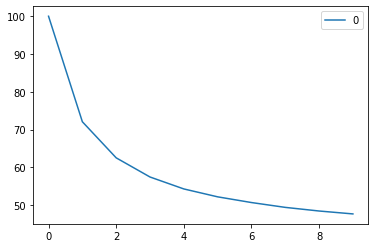

In [32]:
curve = pd.DataFrame(model_val) # elbow curve
curve.plot()

* Krijimi dhe vizualizimi i kurbes (lakores) se si ndryshon vlera e gabimit (error-it) varesisht nga vlera e k-se.

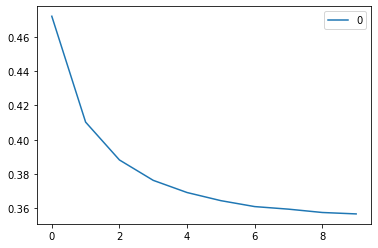

In [33]:
curve = pd.DataFrame(rmse_val) 
curve.plot()

## Zbatimi i modelit KNN per k=3

In [34]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)

model.fit(X_train, Y_train) # trajnon modelin
pred=model.predict(X_test) # ben parashikimin e grupit te ri te te dhenave te reja.
acc_model = round(model.score(X_train, Y_train) * 100, 2) # tregon saktesine e parashikimit ne perqindje.
print(acc_model)
X_test['MAGNITUDE'] = pred  # ne datasetin X_test shtohet atributi "MAGNITUDE" vlerat e se ciles i kemi parashikuar.

# X_test ruhet si csv file ne path-in e poshte shenuar.

X_test.to_csv('csv/result.csv', index = False)

62.52


* Ne vazhdim kemi definuar nje instance te re, me qellim te parashikimit te asaj instance.

In [35]:
# definimi i instances
userInput = [[2020,5,12,10,30,38.83,22.18]]
# parashikimi
userOutput = model.predict(userInput)
userOutput

array([2.86666667])